Prediction for 2023-08-07: 27.4 degrees Celsius
Increase generation


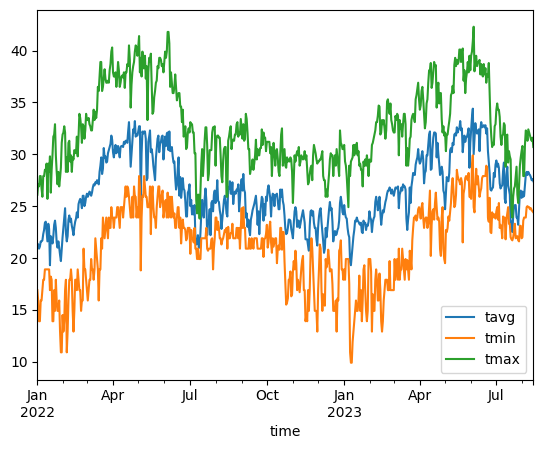

In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import threading
model = LinearRegression()

def iot_data_collection():
    # assume this is the iot part where sensors and actuators come in to give data to our program
    start = datetime(2022, 1, 1)
    end = datetime(2023, 12, 31)
    vancouver = Point(49.2497, -123.1193, 70)
    hyderabad = Point(17.3616, 78.4747, 545)
    data = Daily(hyderabad, start, end)
    data = data.fetch()
    gen_thread = threading.Thread(target=predict_generation, args=(data,))
    gen_thread.start()
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.show()

def predict_generation(data):
    # Do testing/training to give out a model which predicts the generation based on the weather data that we got
    # Split the data into training/testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X = [[i.timestamp()] for x, i in enumerate(data.index)] # Features ie the date in unixtime
    y = data['tavg'] # Target variable ie the temperature
    model.fit(X, y)
    tomorrow = datetime.today() + timedelta(days=1)
    prediction = model.predict([[tomorrow.timestamp()]])  # Assume tavg=20, tmin=15, tmax=25
    print(f"Prediction for {tomorrow.date()}: {prediction[0]:.1f} degrees Celsius")
    optimize_thread = threading.Thread(target=optimize, args=(prediction,))
    optimize_thread.start()

def optimize(tomorrow_prediction):
    # Do some optimization to get the best possible generation based on the model prediction
    if tomorrow_prediction >= model.predict([[datetime.today().timestamp()]]):
        print("Increase generation")
        def turn_solar_on():
            print("Solar on")
            return
    else:
        print("Decrease generation")
        def turn_solar_off():
            print("Solar off")
            return

iot_data_collection()

In [10]:
start = datetime(2022, 1, 1)

hyderabad = Point(17.3616, 78.4747, 545)
data = Daily(hyderabad, start, datetime.today())
data = data.fetch()
df = pandas.DataFrame(data)


TypeError: scatter() missing 1 required positional argument: 'x'

In [4]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,21.4,16.9,26.1,0.0,NaN,107.0,3.5,NaN,1019.4,NaN
2022-01-02,21.3,15.9,27.1,0.0,NaN,95.0,2.9,NaN,1018.1,NaN
2022-01-03,20.9,13.9,26.9,0.0,NaN,78.0,3.0,NaN,1017.1,NaN
2022-01-04,21.1,13.9,27.9,0.0,NaN,72.0,3.3,NaN,1016.6,NaN
2022-01-05,21.6,15.9,27.9,0.0,NaN,146.0,4.3,NaN,1016.8,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-02,25.9,23.6,27.9,0.1,NaN,260.0,17.4,NaN,1007.3,NaN
2023-08-03,26.0,23.9,27.9,0.1,NaN,260.0,18.4,NaN,1007.2,NaN
2023-08-04,27.0,23.9,30.9,2.0,NaN,254.0,13.7,NaN,1008.8,NaN
